## UEFA 2022

The data can be found on the UEFA website, not in an easy accessable file. They need to be copied and subsequently edited to get them in a usable format.

Demonstration:
1. FootballModel
2. NestedSampler
3. Evidence

Author: Do Kester


We need to import some classes

In [1]:
import numpy as numpy
import math

from astropy.io import ascii
from BayesicFitting import FootballModel
from BayesicFitting import ExponentialPrior
from BayesicFitting import UniformPrior
from BayesicFitting import PoissonErrorDistribution
from BayesicFitting import MultipleOutputProblem

from BayesicFitting import NestedSampler
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
from BayesicFitting import Tools
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


In [2]:
#%matplotlib osx

Read the data

In [3]:
tbl = ascii.read( "data/NationsLeague-2022.txt" )
#print( tbl )
homen = tbl['home'].data
hs = numpy.asarray( tbl['hs'].data, dtype=int )
ws = numpy.asarray( tbl['as'].data, dtype=int )
awayn = tbl['away'].data
#print( hs )
#print( ws )
scoren = numpy.append( hs, ws ).reshape( (2,-1) ).transpose()
#print( scoren )

In [4]:
tbl = ascii.read( "data/Qualifiers-2022.txt" )
#print( tbl )
homeq = tbl['home'].data
hs = numpy.asarray( tbl['hs'].data, dtype=int )
ws = numpy.asarray( tbl['as'].data, dtype=int )
awayq = tbl['away'].data
#print( hs )
#print( ws )
scoreq = numpy.append( hs, ws ).reshape( (2,-1) ).transpose()
#print( scoreq )


In 'home' we have the names of the teams playing a their home field.

In 'away' we have the names of the visiting teams.

In 'score' we have the scores of the matches.

In [5]:
home = numpy.append( homen, homeq )
away = numpy.append( awayn, awayq )
score = numpy.append( scoren, scoreq, axis=0 )


In [6]:
names = numpy.unique( home )
print( len( names ) )
namdic = {}
for k, name in enumerate( names ) :
    namdic[name] = k
xdata = numpy.zeros( (338,2), dtype=int )
k = 0
for h,a in zip( home, away ):
    xdata[k,:] = [namdic[h], namdic[a]]
    k += 1
print( fmt( xdata, tail=3 ) )

56
[[        0       23]
 [       21       38]
 [       28       10]
 [       39       47]
 [       41       50]
  ...
 [       24       42]
 [       47       42]
 [        4       42]]


We have 56 teams playing in the european leagues for nations.

In [7]:
fm = FootballModel( 56 )
## keep away from the edges.
eps = 0.01
fm.setPrior( 0, ExponentialPrior() )
fm.setPrior( 1, UniformPrior(), limits=[eps,1-eps] )
fm.setPrior( 2, UniformPrior(), limits=[eps,2-eps] )
fm.setPrior( 3, UniformPrior(), limits=[eps,2-eps] )
fm.setPrior( 4, UniformPrior(), limits=[eps,2-eps] )



In [8]:
problem = MultipleOutputProblem( model=fm, xdata=xdata, ydata=score )


In [9]:
# define NestedSampler
ed = PoissonErrorDistribution()
ns = NestedSampler( problem=problem, distribution=ed, seed=1301 )
ns.verbose = 2
# run NestedSampler
evi = ns.sample( )


Fit all parameters of
  Foolball
Using a Poisson error distribution
Moving the walkers with   GalileanEngine  ChordEngine
Iteration     logZ        H       LowL     npar parameters
       0  -4.23e+03      4.6  -4.23e+03    280  [    0.444    0.067    0.132    1.248 ...]
     100  -3.38e+03      5.2  -3.38e+03    280  [    0.282    0.457    1.047    1.046 ...]
     200  -3.17e+03      5.8  -3.16e+03    280  [    0.248    0.334    0.218    0.470 ...]
     300  -3.04e+03      6.3  -3.03e+03    280  [    1.132    0.860    0.732    1.388 ...]
     400  -2.91e+03      7.7  -2.91e+03    280  [    1.332    0.313    1.835    0.880 ...]
     500  -2.81e+03      8.3  -2.80e+03    280  [    0.500    0.845    1.482    1.588 ...]
     600  -2.72e+03      9.1  -2.71e+03    280  [    1.667    0.452    1.666    0.913 ...]
     700  -2.62e+03     10.5  -2.61e+03    280  [    0.960    0.860    0.663    1.833 ...]
     800  -2.54e+03     11.4  -2.53e+03    280  [    0.114    0.732    0.874    1.516 ...]


In [10]:
sl = ns.samples
pars = sl.parameters
trial = pars[0:280:5]
defen = pars[1:280:5]
midf = pars[2:280:5]
homad = pars[3:280:5]
strat = pars[4:280:5]


In [11]:
ks = numpy.argsort( trial )
ks = numpy.flip( ks )

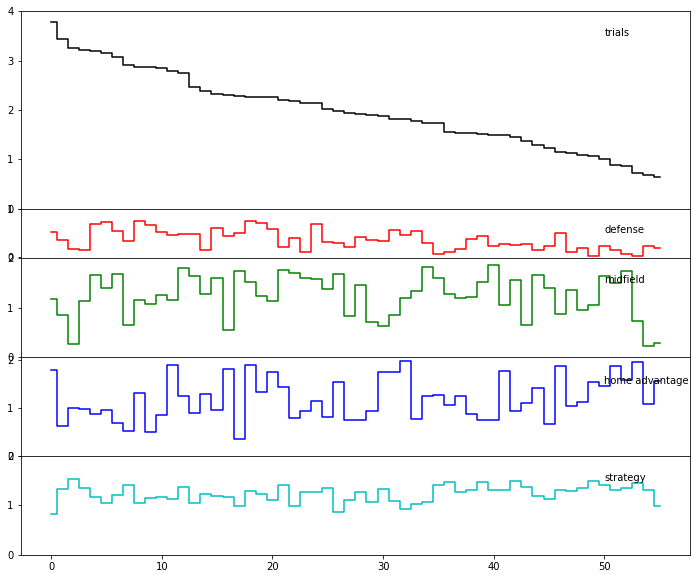

In [12]:
plt.figure( 1, figsize=(12,10) )
plt.subplots_adjust( hspace=0.001 )
gs = gridspec.GridSpec( 5, 1, height_ratios=[4,1,2,2,2])

ax0 = plt.subplot( gs[0] )
ax0.step( trial[ks], 'k-', where='mid' )
plt.yticks( [0,1,2,3,4] )
plt.text( 50, 3.5, "trials" )
ax1 = plt.subplot( gs[1] )
plt.step( defen[ks], 'r-', where='mid' )
plt.yticks( [0,1] )
plt.text( 50, 0.5, "defense" )
ax2 = plt.subplot( gs[2] )
plt.step( midf[ks], 'g-', where='mid' )
plt.yticks( [0,1,2] )
plt.text( 50, 1.5, "midfield" )
ax3 = plt.subplot( gs[3] )
plt.step( homad[ks], 'b-', where='mid' )
plt.yticks( [0,1,2] )
plt.text( 50, 1.5, "home advantage" )
ax4 = plt.subplot( gs[4] )
plt.step( strat[ks], 'c-', where='mid' )
plt.yticks( [0,1,2] )
plt.text( 50, 1.5, "strategy" )
plt.show()


In [13]:
for i, k in enumerate( ks ):
    print( "%3d %-20.20s  %6.2f  %6.2f  %6.2f  %6.2f  %6.2f" % ( i, names[k], trial[k], defen[k], midf[k], homad[k], strat[k] ))

  0 Belgium                 3.77    0.52    1.19    1.79    0.83
  1 Kosovo                  3.44    0.36    0.86    0.63    1.33
  2 Gibraltar               3.26    0.17    0.27    0.99    1.53
  3 Israel                  3.21    0.16    1.14    0.98    1.36
  4 Portugal                3.20    0.70    1.67    0.88    1.17
  5 Switzerland             3.15    0.72    1.39    0.96    1.04
  6 England                 3.06    0.54    1.69    0.68    1.21
  7 Malta                   2.91    0.33    0.65    0.52    1.41
  8 France                  2.88    0.75    1.16    1.31    1.06
  9 NorthMacedonia          2.86    0.66    1.07    0.50    1.15
 10 CzechRepublic           2.85    0.52    1.26    0.85    1.17
 11 Netherlands             2.78    0.46    1.15    1.90    1.14
 12 Serbia                  2.75    0.47    1.81    1.25    1.38
 13 Ireland                 2.46    0.49    1.64    0.89    1.04
 14 Turkey                  2.39    0.14    1.28    1.29    1.24
 15 Spain                